<a href="https://colab.research.google.com/github/AmjadNasser1/NLP-LABS/blob/main/nlp_lab_day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br>
RNN Practical — Intro to Recurrent Neural Networks<br>
Topics: Motivation, Basics, Architectures (One-to-Many, Many-to-One, etc.), Shared Parameters<br>
Instructions: Complete each task by filling in the "Your answer here" sections.<br>


In [ ]:
import numpy as np

------------------------------<br>
Task 1: RNN Architectures <br>
------------------------------

In [1]:
def task1_architectures():
    """
    Identify the correct RNN architecture (One-to-One, One-to-Many, Many-to-One, Many-to-Many)
    for the following scenarios:
    a) Sentiment analysis of a sentence -> single label
    b) Music generation from a single start token -> output sequence
    c) Named entity recognition: tag each word in a sentence
    d) Machine translation: source sentence -> target sentence
    """
    # Your answer here:
    # a) Many-to-One: Sentiment analysis of a sentence -> single label
    # b) One-to-Many:  Music generation from a single start token -> output sequence
    # c) Many-to-Many: Named entity recognition: tag each word in a sentence
    # d) Many-to-Many: (encoder-decoder): Machine translation: source sentence -> target sentence

------------------------------<br>
Task 2: Shared Parameters <br>
------------------------------

In [25]:
def task2_shared_parameters():
    """
    1- Explain shared parameters in an RNN.
    Compute parameter counts for an example:
    2- input size d=4, hidden size h=3, sequence length T=10
    """
    # Your answer here:
    # 1- RNNs share parameters because they repeat the same operation at every step of the sequence:
    # Take the current input, combine it with the previous hidden state, apply the same weight matrices, pass it through an activation function, then generate an output, this makes the model compact and effeicint

#2:
def parameter_count(input_size, hidden_size, seq_len):

    W_x = hidden_size * input_size   # input to hidden weights
    W_h = hidden_size * hidden_size  # hidden to hidden weights
    b   = hidden_size                # bias

    total = W_x + W_h + b

    return {

        "Total parameters": total,
    }

parameter =  parameter_count(4, 3, 10)
print(parameter)

{'Total parameters': 24}


------------------------------<br>
Task 3: Manual Forward Pass <br>
------------------------------

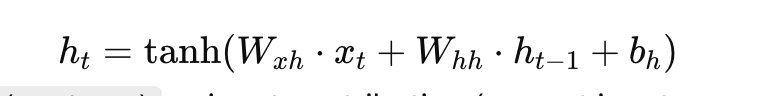

In [28]:
import numpy as np

def task3_manual_forward_pass():
    """
    Compute hidden states manually for a small RNN using np.tanh.
    Input sequence length T=3, input size=2, hidden size=2
    """
    x_seq = [np.array([0.5, -1.0]),
             np.array([1.0, 0.0]),
             np.array([-0.5, 0.5])]
    h_prev = np.zeros(2)
    W_xh = np.array([[0.6, -0.2],
                     [0.1,  0.5]])
    W_hh = np.array([[0.3, 0.4],
                     [-0.2, 0.2]])
    b_h = np.array([0.0,0.1])
    h_list = []

    # Your code here
    for x in x_seq:
        h_t = np.tanh(np.dot(W_xh, x) + np.dot(W_hh, h_prev) + b_h) #dot might not be the best option.
        h_list.append(h_t)
        h_prev = h_t
    return h_list

hidden_states = task3_manual_forward_pass()
print("Hidden states:", hidden_states)

Hidden states: [array([ 0.46211716, -0.33637554]), array([0.53994993, 0.04027965]), array([-0.21833125,  0.19743869])]


------------------------------<br>
Task 4: NumPy RNN Cell Implementation <br>
------------------------------

In [ ]:
def task4_numpy_rnn_cell():
    """
    Implement a simple Many-to-One RNN in NumPy.
    Use rnn_forward to compute h_T, then compute a readout: y = W_hy h_T + b_y
    Predict class = argmax(y)
    """

    # Toy dataset
    toy_sequences = [
        [np.array([1.0,0.5]), np.array([0.2,0.1]), np.array([0.3,-0.1])],
        [np.array([-0.5,-0.4]), np.array([0.1,-0.2]), np.array([-0.3,-0.1])],
        [np.array([0.8,0.2]), np.array([0.5,0.4]), np.array([0.1,0.2])],
        [np.array([-0.6,-0.2]), np.array([-0.4,-0.3]), np.array([0.0,-0.1])]
    ]
    labels = np.array([1,0,1,0])

    # Parameters (randomly initialized for demonstration)
    input_size = 2
    hidden_size = 3
    num_classes = 2
    W_xh = np.random.randn(hidden_size, input_size) * 0.01
    W_hh = np.random.randn(hidden_size, hidden_size) * 0.01 #to avoid large numbers before feeding to Tanh
    b_h = np.zeros((hidden_size, 1))
    W_hy = np.random.randn(num_classes, hidden_size) * 0.01
    b_y = np.zeros((num_classes, 1))

    def rnn_forward(sequence, h_prev):
        h = h_prev
        for x in sequence:
            # Reshape x to be a column vector
            x = x.reshape(-1, 1)
            h = np.tanh(np.dot(W_xh, x) + np.dot(W_hh, h) + b_h)
        return h

    predictions = []
    for sequence in toy_sequences:
        h_T = rnn_forward(sequence, np.zeros((hidden_size, 1))) # Initial hidden state is zero
        # Compute readout
        y = np.dot(W_hy, h_T) + b_y
        # Predict class
        predicted_class = np.argmax(y)
        predictions.append(predicted_class)

    return predictions, labels

predictions, actual_labels = task4_numpy_rnn_cell()
print("Predictions:", predictions)
print("Actual Labels:", actual_labels)

In [ ]:
"""
Goal:
- Introduction to tensors in PyTorch
- Build a simple RNN-based classifier

Dataset:
- We will classify short sequences of numbers as "increasing" or "decreasing"
  Example:
    [1, 2, 3, 4] → Label: 1 (increasing)
    [5, 3, 1, 0] → Label: 0 (decreasing)

----------------------------------------------------
"""

import torch
import torch.nn as nn
import torch.optim as optim

# ====================================================
# STEP 1: Create a Tiny Synthetic Dataset
# ====================================================

def generate_data(num_samples=100, seq_len=4):
    X = []
    y = []
    for _ in range(num_samples):
        if torch.rand(1).item() > 0.5:
            seq = torch.sort(torch.rand(seq_len))[0]   # Increasing
            label = 1
        else:
            seq = torch.sort(torch.rand(seq_len), descending=True)[0]  # Decreasing
            label = 0
        X.append(seq.unsqueeze(-1))  # Shape: (seq_len, input_size=1)
        y.append(label)
    return torch.stack(X), torch.tensor(y)

X, y = generate_data()
# X shape → (batch_size=100, seq_len=4, input_size=1)
# y shape → (batch_size=100)

# ====================================================
# STEP 2: Define a Simple RNN Classifier
# ====================================================

class RNNClassifier(nn.Module):
    def __init__(self, input_size=1, hidden_size=8, num_classes=2):
        super().__init__()


    def forward(self, x):


model = RNNClassifier()
print(model)

# ====================================================
# STEP 3: Train the Model
# ====================================================

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# ====================================================
# STEP 4: Test the Model on New Data
# ====================================================

test_X, test_y = generate_data(num_samples=10)

print("\nPredictions vs Actual:")